## Project Title:            Algerian Forest Temperature Prediction Project
### Technology:              Machine Learning Technology
### Domain:                  Agriculture
### Project Difficulty Level: Intermediate

> Problem Statement:

The Goal is to predict the temperature of the forest. This is basically a Regression problem where the forest has recorded from June 2012 to September 2012.

> Dataset to downloaded from the below link:

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#




> In this Notebook:

- Feature Selection
- Modelling Regression Model



> Upcoming Projects:

- Using Grid Search and Cross Validation techniques to build optimozed model
- To Apply Grid Search we need to understand the hyperparameters for each regression algorithm we applied Above.


In [928]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None) # to disply all columns

In [929]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BE09-1442

 Directory of d:\Data Scientist\1_iNeuron\02 Full Stack Data Science ineuron\03 Machine Learning\Algerian Forest\EDA-on-Algerian-Forest-Fires-Dataset

24-05-2023  19:42    <DIR>          .
22-05-2023  16:24    <DIR>          ..
19-05-2023  12:08            14,759 Algerian_forest_fires_dataset_UPDATE.csv
24-05-2023  19:42    <DIR>          catboost_info
19-05-2023  14:40           137,819 Cleaning_Split.ipynb
19-05-2023  15:50           707,627 Data Preparation_test.ipynb
24-05-2023  19:37         6,011,913 Data Preparation_train.ipynb
24-05-2023  12:47           565,158 Exploratoty Data Analysis.ipynb
24-05-2023  20:13           631,433 Feature Selection.ipynb
19-05-2023  12:08            35,823 LICENSE
19-05-2023  15:50             8,131 prepared_data_test.csv
19-05-2023  15:44            16,596 prepared_data_train.csv
22-05-2023  16:22           126,812 prepared_tranformed_data_train.csv
24-05-2023  18:50           

In [930]:
dataset = pd.read_csv("prepared_tranformed_new_data_train.csv")
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset\n")
dataset.head()

There are 162 rows and 17 columns in the dataset



,day,month,year,Temperature,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
0,11,7,2012,33,76,0.0,1,2.246811e+07,1.612452,1.483240,2.846050,2.753811,2.846050,2.631687,4.324350,3.168744,7.437860
1,14,6,2012,30,78,0.0,1,5.950505e+06,1.000000,0.632456,2.144761,1.860759,2.097618,1.740271,2.792848,2.170453,9.899631
2,4,6,2012,25,89,0.0,1,2.849455e+06,0.000000,0.000000,1.140175,0.271226,1.303840,0.561578,2.626785,2.034151,6.997559
3,16,6,2012,29,87,1.0,1,2.849455e+06,0.447214,0.316228,2.049390,1.728677,2.024846,1.644357,2.828427,2.198710,7.868350
4,25,6,2012,31,64,0.0,0,2.969391e+07,2.387467,2.898275,3.768289,3.774977,4.277850,4.016839,7.987490,4.650468,7.868350


In [931]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              162 non-null    int64  
 1   month            162 non-null    int64  
 2   year             162 non-null    int64  
 3   Temperature      162 non-null    int64  
 4   RH               162 non-null    int64  
 5   Region           162 non-null    float64
 6   Classes_notfire  162 non-null    int64  
 7   FFMCiqrO_Boxcox  162 non-null    float64
 8   ISIiqrO_square   162 non-null    float64
 9   FWIiqrO_square   162 non-null    float64
 10  DMCiqrO_square   162 non-null    float64
 11  DMCiqrO_Boxcox   162 non-null    float64
 12  BUIiqrO_square   162 non-null    float64
 13  BUIiqrO_Boxcox   162 non-null    float64
 14  DCiqrO_square    162 non-null    float64
 15  DCiqrO_Boxcox    162 non-null    float64
 16  WsiqrO_Boxcox    162 non-null    float64
dtypes: float64(11), 

In [932]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,162.0,1.629630e+01,8.934467e+00,1.000000e+00,9.000000e+00,1.700000e+01,2.400000e+01,3.100000e+01
month,162.0,7.450617e+00,1.098008e+00,6.000000e+00,6.250000e+00,7.000000e+00,8.000000e+00,9.000000e+00
year,162.0,2.012000e+03,0.000000e+00,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03
Temperature,162.0,3.223457e+01,3.737577e+00,2.200000e+01,3.000000e+01,3.200000e+01,3.500000e+01,4.200000e+01
RH,162.0,6.146296e+01,1.516417e+01,2.100000e+01,5.125000e+01,6.200000e+01,7.450000e+01,9.000000e+01
Region,162.0,5.000000e-01,5.015504e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Classes_notfire,162.0,4.382716e-01,4.977135e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FFMCiqrO_Boxcox,162.0,2.309581e+07,1.136631e+07,2.849455e+06,1.439645e+07,2.588973e+07,3.239324e+07,4.544337e+07
ISIiqrO_square,162.0,1.991892e+00,9.636021e-01,0.000000e+00,1.193598e+00,1.949359e+00,2.734033e+00,4.068169e+00
FWIiqrO_square,162.0,2.270322e+00,1.463996e+00,0.000000e+00,8.366600e-01,2.246973e+00,3.485663e+00,5.415256e+00


In [933]:
#dataset.drop(['Ws','Rain','DC','ISI','BUI','FWI','FFMC','DMC'],axis = 1,inplace=True)
#X_test.drop(['Ws','Rain',	'FFMC',	'DMC'],axis = 1,inplace=True)
# 'Ws','Rain'
#'FFMC','DMC',

In [934]:
dataset.nunique()

day                 31
month                4
year                 1
Temperature         19
RH                  57
Region               2
Classes_notfire      2
FFMCiqrO_Boxcox    115
ISIiqrO_square      88
FWIiqrO_square     100
DMCiqrO_square     118
DMCiqrO_Boxcox     118
BUIiqrO_square     120
BUIiqrO_Boxcox     120
DCiqrO_square      129
DCiqrO_Boxcox      129
WsiqrO_Boxcox       14
dtype: int64

In [935]:
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<5 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 17 features
[]

 Numerical feature Count 17
['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox', 'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox', 'WsiqrO_Boxcox']

 Unique feature Count 0 out of 17 features

 Continuous feature Count 13 out of 17 features
['day', 'Temperature', 'RH', 'FFMCiqrO_Boxcox', 'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox', 'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox', 'WsiqrO_Boxcox']

 Discrete Variables Count: 4 out of 17 features
['month', 'year', 'Region', 'Classes_notfire']


,Discrete Features,No of Unique Values,Unique Values
0,month,4,"[7, 6, 9, 8]"
1,year,1,[2012]
2,Region,2,"[0.0, 1.0]"
3,Classes_notfire,2,"[1, 0]"


In [936]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 0
[]


,Categorical Features,No. of Categories,Categories


In [937]:
[data[str(feature)].unique() for feature in categorical_features]


[]

In [938]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,162.0,1.629630e+01,8.934467e+00,1.000000e+00,9.000000e+00,1.700000e+01,2.400000e+01,3.100000e+01
month,162.0,7.450617e+00,1.098008e+00,6.000000e+00,6.250000e+00,7.000000e+00,8.000000e+00,9.000000e+00
year,162.0,2.012000e+03,0.000000e+00,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03
Temperature,162.0,3.223457e+01,3.737577e+00,2.200000e+01,3.000000e+01,3.200000e+01,3.500000e+01,4.200000e+01
RH,162.0,6.146296e+01,1.516417e+01,2.100000e+01,5.125000e+01,6.200000e+01,7.450000e+01,9.000000e+01
Region,162.0,5.000000e-01,5.015504e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Classes_notfire,162.0,4.382716e-01,4.977135e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FFMCiqrO_Boxcox,162.0,2.309581e+07,1.136631e+07,2.849455e+06,1.439645e+07,2.588973e+07,3.239324e+07,4.544337e+07
ISIiqrO_square,162.0,1.991892e+00,9.636021e-01,0.000000e+00,1.193598e+00,1.949359e+00,2.734033e+00,4.068169e+00
FWIiqrO_square,162.0,2.270322e+00,1.463996e+00,0.000000e+00,8.366600e-01,2.246973e+00,3.485663e+00,5.415256e+00


### 1.6 Info about dataset and its attributes

1. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for Bejaia region and 121 for Sidi Bel-abbes region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 243 instances have been classified into fire (137 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

# Checking the correlation between features and Target feature

In [939]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region',
       'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square',
       'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox', 'BUIiqrO_square',
       'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox', 'WsiqrO_Boxcox'],
      dtype='object')

In [940]:
data.corr()['Temperature'].sort_values(ascending=True)

RH                -0.640282
Classes_notfire   -0.503021
WsiqrO_Boxcox     -0.323371
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO_square      0.426718
DCiqrO_Boxcox      0.460491
BUIiqrO_square     0.547783
DMCiqrO_square     0.579825
BUIiqrO_Boxcox     0.580233
DMCiqrO_Boxcox     0.609642
FWIiqrO_square     0.632393
ISIiqrO_square     0.664173
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

In [941]:
#sns.pairplot(data)

In [942]:
X = data.drop('Temperature',axis=1)
y = data['Temperature']

In [943]:
X

,day,month,year,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
0,11,7,2012,76,0.0,1,2.246811e+07,1.612452,1.483240,2.846050,2.753811,2.846050,2.631687,4.324350,3.168744,7.437860
1,14,6,2012,78,0.0,1,5.950505e+06,1.000000,0.632456,2.144761,1.860759,2.097618,1.740271,2.792848,2.170453,9.899631
2,4,6,2012,89,0.0,1,2.849455e+06,0.000000,0.000000,1.140175,0.271226,1.303840,0.561578,2.626785,2.034151,6.997559
3,16,6,2012,87,1.0,1,2.849455e+06,0.447214,0.316228,2.049390,1.728677,2.024846,1.644357,2.828427,2.198710,7.868350
4,25,6,2012,64,0.0,0,2.969391e+07,2.387467,2.898275,3.768289,3.774977,4.277850,4.016839,7.987490,4.650468,7.868350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,7,8,2012,69,0.0,0,2.940889e+07,2.345208,2.828427,3.937004,3.947748,4.147288,3.902884,6.971370,4.313516,8.289879
158,11,8,2012,31,1.0,0,4.198955e+07,4.068169,4.647580,4.743416,4.726909,4.732864,4.399019,6.804410,4.253996,7.868350
159,26,9,2012,54,0.0,1,2.352788e+07,1.581139,1.303840,2.449490,2.264318,2.489980,2.227009,4.037326,3.008836,6.083296
160,18,7,2012,68,0.0,0,2.787833e+07,2.144761,2.449490,3.478505,3.469010,3.768289,3.559867,6.565059,4.166351,7.437860


In [944]:
y

0      33
1      30
2      25
3      29
4      31
       ..
157    32
158    40
159    31
160    31
161    32
Name: Temperature, Length: 162, dtype: int64

In [945]:
y= y.to_numpy(dtype='int64')
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
y= y.reshape(-1,1)
y


array([[33],
       [30],
       [25],
       [29],
       [31],
       [29],
       [30],
       [35],
       [36],
       [38],
       [32],
       [30],
       [37],
       [39],
       [31],
       [35],
       [35],
       [28],
       [38],
       [31],
       [30],
       [31],
       [28],
       [28],
       [24],
       [29],
       [31],
       [28],
       [32],
       [33],
       [30],
       [30],
       [34],
       [29],
       [31],
       [30],
       [33],
       [36],
       [35],
       [33],
       [26],
       [31],
       [36],
       [28],
       [34],
       [39],
       [31],
       [31],
       [33],
       [31],
       [35],
       [31],
       [28],
       [22],
       [37],
       [34],
       [31],
       [29],
       [25],
       [29],
       [35],
       [33],
       [35],
       [35],
       [27],
       [31],
       [32],
       [28],
       [33],
       [36],
       [30],
       [30],
       [28],
       [24],
       [33],
       [32],
       [34],

In [946]:


from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((113, 16), (49, 16))

# Feature Selection:

### Feature Selection- Dropping constant features
In this step we will be removing the features which have constant features which are actually not important
for solving the problem statement


##### Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

## Apply only on Independent Feature:

In [947]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [948]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [949]:
### Finding non constant features
sum(var_thres.get_support())

15

In [950]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

15

In [951]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [952]:
for column in constant_columns:
    print(column)

year


In [953]:
X_train = X_train.drop(constant_columns,axis=1)
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,2.190890,2.664583,3.714835,3.719441,4.207137,3.955373,7.835815,4.602696,9.507538
55,20,9,58,1.0,1,2.067414e+07,1.449138,1.949359,4.324350,4.331003,4.939636,4.565686,9.380832,5.054987,6.997559
160,18,7,68,0.0,0,2.787833e+07,2.144761,2.449490,3.478505,3.469010,3.768289,3.559867,6.565059,4.166351,7.437860
18,7,7,43,1.0,0,2.733706e+07,2.024846,2.280351,3.605551,3.604651,3.701351,3.497246,5.949790,3.927209,6.997559
92,2,6,61,0.0,1,8.578051e+06,1.000000,0.632456,2.024846,1.694194,1.974842,1.577294,2.756810,2.141501,6.997559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.414214,0.894427,2.097618,1.795841,2.097618,1.740271,3.240370,2.504629,7.437860
103,13,7,45,1.0,0,2.760668e+07,2.049390,2.167948,3.361547,3.341949,3.301515,3.108825,3.224903,2.493788,6.997559
67,2,9,67,1.0,1,1.657272e+07,1.414214,0.894427,1.702939,1.221108,2.000000,1.611156,4.037326,3.008836,9.507538
117,13,9,49,1.0,0,3.250754e+07,3.016621,3.209361,3.391165,3.374330,3.521363,3.325554,5.779273,3.857022,9.507538


# 'Year' is Constant Feature.

- Dropping from x_test also without checking.

In [954]:
X_test= X_test.drop(constant_columns,axis=1)
X_test

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
66,24,6,66,0.0,0,2.856633e+07,2.366432,2.738613,3.346640,3.325597,3.860052,3.644680,7.469940,4.483965,8.703180
131,27,8,54,1.0,0,3.634623e+07,3.162278,5.108816,6.593557,6.296191,6.850182,5.944987,12.044708,5.697720,7.437860
145,29,7,73,0.0,0,2.955114e+07,2.366432,3.449638,5.167204,5.109982,5.916080,5.302925,11.269428,5.524970,7.868350
7,31,7,64,0.0,0,3.041563e+07,2.607681,3.962323,5.648008,5.526162,6.418723,5.655140,12.044708,5.697720,8.703180
44,14,7,61,0.0,1,1.523873e+07,1.183216,0.894427,2.792848,2.690201,2.898275,2.688534,4.785394,3.406761,6.997559
74,7,6,54,0.0,0,3.189903e+07,2.529822,2.683282,3.146427,3.102377,3.301515,3.108825,5.522681,3.747836,6.997559
124,27,7,87,1.0,1,2.122259e+07,1.673320,1.788854,3.435113,3.422120,3.435113,3.241484,5.319774,3.658237,9.108882
159,26,9,54,0.0,1,2.352788e+07,1.581139,1.303840,2.449490,2.264318,2.489980,2.227009,4.037326,3.008836,6.083296
86,28,9,47,0.0,1,1.858731e+07,1.341641,0.948683,2.664583,2.534324,2.607681,2.364268,2.966479,2.305429,7.437860
122,26,6,62,1.0,0,3.129921e+07,2.645751,3.082207,4.062019,4.073410,4.049691,3.816343,5.873670,3.896102,8.289879


In [955]:
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,2.190890,2.664583,3.714835,3.719441,4.207137,3.955373,7.835815,4.602696,9.507538
55,20,9,58,1.0,1,2.067414e+07,1.449138,1.949359,4.324350,4.331003,4.939636,4.565686,9.380832,5.054987,6.997559
160,18,7,68,0.0,0,2.787833e+07,2.144761,2.449490,3.478505,3.469010,3.768289,3.559867,6.565059,4.166351,7.437860
18,7,7,43,1.0,0,2.733706e+07,2.024846,2.280351,3.605551,3.604651,3.701351,3.497246,5.949790,3.927209,6.997559
92,2,6,61,0.0,1,8.578051e+06,1.000000,0.632456,2.024846,1.694194,1.974842,1.577294,2.756810,2.141501,6.997559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.414214,0.894427,2.097618,1.795841,2.097618,1.740271,3.240370,2.504629,7.437860
103,13,7,45,1.0,0,2.760668e+07,2.049390,2.167948,3.361547,3.341949,3.301515,3.108825,3.224903,2.493788,6.997559
67,2,9,67,1.0,1,1.657272e+07,1.414214,0.894427,1.702939,1.221108,2.000000,1.611156,4.037326,3.008836,9.507538
117,13,9,49,1.0,0,3.250754e+07,3.016621,3.209361,3.391165,3.374330,3.521363,3.325554,5.779273,3.857022,9.507538


##### 2. Feature Selection- With Correlation
In this step we will be removing the independent features which are highly correlated 

In [956]:
X_train.corr(method='spearman')

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,ISIiqrO_square,FWIiqrO_square,DMCiqrO_square,DMCiqrO_Boxcox,BUIiqrO_square,BUIiqrO_Boxcox,DCiqrO_square,DCiqrO_Boxcox,WsiqrO_Boxcox
day,1.000000,0.019005,0.067738,-0.052100,-0.149789,0.168747,0.139297,0.273451,0.489832,0.489832,0.504283,0.504283,0.472197,0.472197,0.088315
month,0.019005,1.000000,-0.034504,0.093222,-0.076203,0.070973,0.061899,0.055741,0.020443,0.020443,0.023311,0.023311,0.068881,0.068881,0.055048
RH,0.067738,-0.034504,1.000000,-0.425166,0.416054,-0.670201,-0.646219,-0.578439,-0.436542,-0.436542,-0.393157,-0.393157,-0.294413,-0.294413,0.186085
Region,-0.052100,0.093222,-0.425166,1.000000,-0.197348,0.265044,0.234749,0.193338,0.182657,0.182657,0.106323,0.106323,-0.032445,-0.032445,-0.195129
Classes_notfire,-0.149789,-0.076203,0.416054,-0.197348,1.000000,-0.863029,-0.862110,-0.849724,-0.731655,-0.731655,-0.721585,-0.721585,-0.673743,-0.673743,0.013720
FFMCiqrO_Boxcox,0.168747,0.070973,-0.670201,0.265044,-0.863029,1.000000,0.987379,0.969162,0.818791,0.818791,0.802821,0.802821,0.736821,0.736821,-0.035882
ISIiqrO_square,0.139297,0.061899,-0.646219,0.234749,-0.862110,0.987379,1.000000,0.972201,0.811073,0.811073,0.799928,0.799928,0.744705,0.744705,0.068409
FWIiqrO_square,0.273451,0.055741,-0.578439,0.193338,-0.849724,0.969162,0.972201,1.000000,0.908679,0.908679,0.903909,0.903909,0.850446,0.850446,0.067570
DMCiqrO_square,0.489832,0.020443,-0.436542,0.182657,-0.731655,0.818791,0.811073,0.908679,1.000000,1.000000,0.988643,0.988643,0.903395,0.903395,0.013615
DMCiqrO_Boxcox,0.489832,0.020443,-0.436542,0.182657,-0.731655,0.818791,0.811073,0.908679,1.000000,1.000000,0.988643,0.988643,0.903395,0.903395,0.013615


In [957]:
help(X_train.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and S

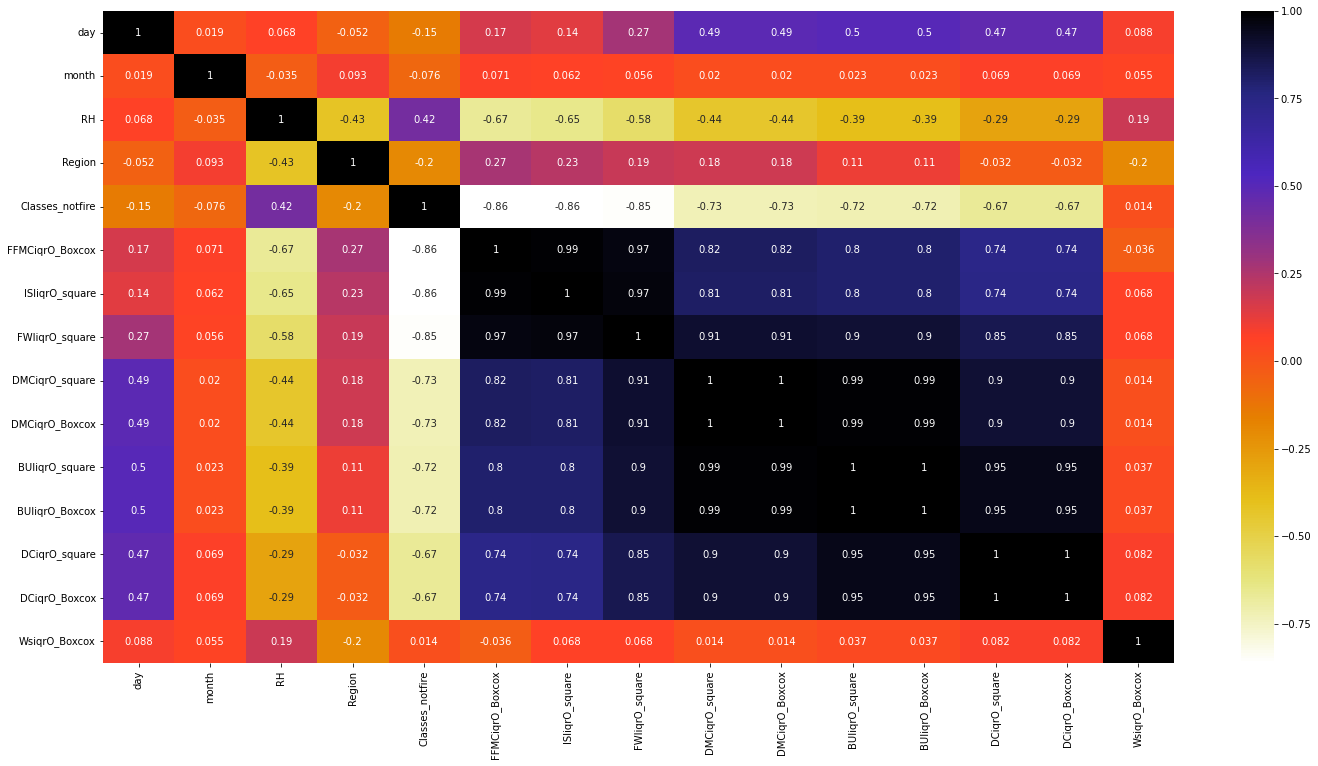

In [958]:
import seaborn as sns
#Using Pearson Correlation good for linear data.
# Using Spearman Correlation good for Non-linear data.
plt.figure(figsize=(24,12))
cor = X_train.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [959]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [960]:
corr_features = correlation(X_train, 0.70)
len(set(corr_features))
# cirrelation more than 70 percentage

9

In [961]:
corr_features

{'BUIiqrO_Boxcox',
 'BUIiqrO_square',
 'DCiqrO_Boxcox',
 'DCiqrO_square',
 'DMCiqrO_Boxcox',
 'DMCiqrO_square',
 'FFMCiqrO_Boxcox',
 'FWIiqrO_square',
 'ISIiqrO_square'}

In [962]:
data.corr()['Temperature'].sort_values(ascending=True)

RH                -0.640282
Classes_notfire   -0.503021
WsiqrO_Boxcox     -0.323371
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO_square      0.426718
DCiqrO_Boxcox      0.460491
BUIiqrO_square     0.547783
DMCiqrO_square     0.579825
BUIiqrO_Boxcox     0.580233
DMCiqrO_Boxcox     0.609642
FWIiqrO_square     0.632393
ISIiqrO_square     0.664173
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

In [963]:
corr_features  = ['BUIiqrO_square','DCiqrO_square','DMCiqrO_square','FWIiqrO_square','ISIiqrO_square']

In [964]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [965]:
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox,BUIiqrO_Boxcox,DCiqrO_Boxcox,WsiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,3.719441,3.955373,4.602696,9.507538
55,20,9,58,1.0,1,2.067414e+07,4.331003,4.565686,5.054987,6.997559
160,18,7,68,0.0,0,2.787833e+07,3.469010,3.559867,4.166351,7.437860
18,7,7,43,1.0,0,2.733706e+07,3.604651,3.497246,3.927209,6.997559
92,2,6,61,0.0,1,8.578051e+06,1.694194,1.577294,2.141501,6.997559
...,...,...,...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.795841,1.740271,2.504629,7.437860
103,13,7,45,1.0,0,2.760668e+07,3.341949,3.108825,2.493788,6.997559
67,2,9,67,1.0,1,1.657272e+07,1.221108,1.611156,3.008836,9.507538
117,13,9,49,1.0,0,3.250754e+07,3.374330,3.325554,3.857022,9.507538


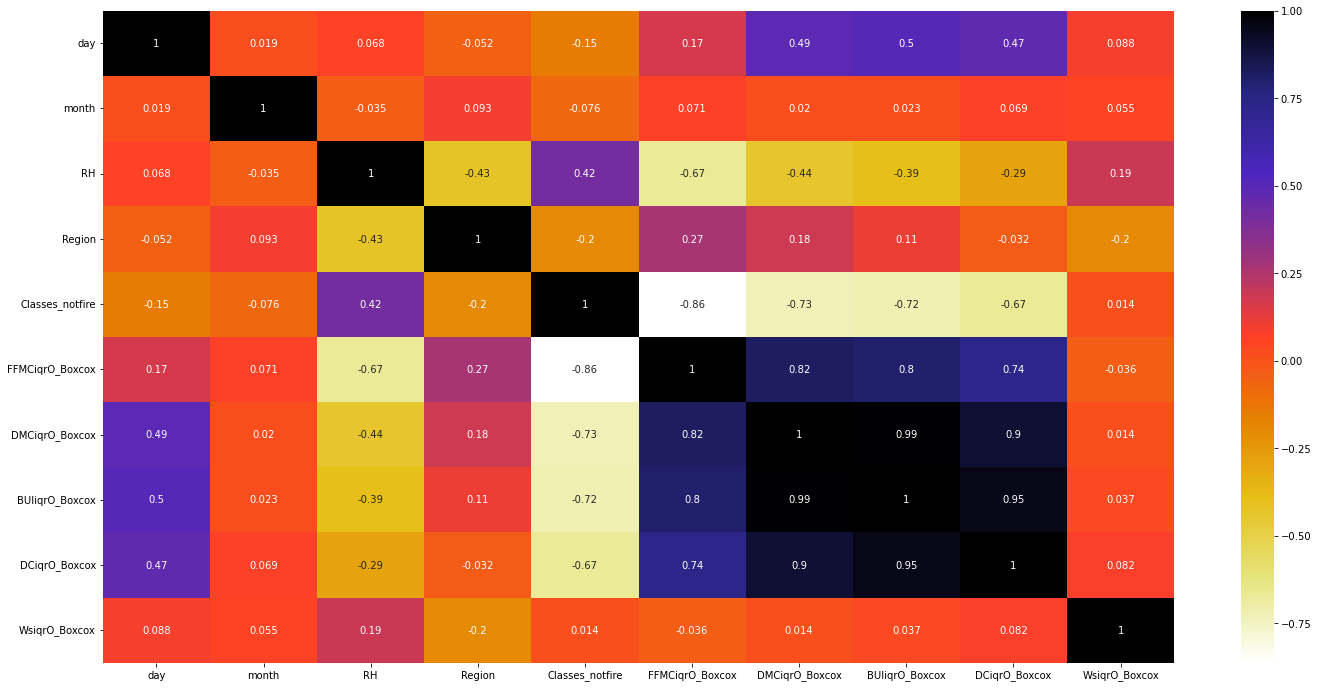

In [966]:
import seaborn as sns
#Using Pearson Correlation good for linear data.
# Using Spearman Correlation good for Non-linear data.
plt.figure(figsize=(24,12))
cor = X_train.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [967]:
data.corr()['Temperature'].sort_values(ascending=True)

RH                -0.640282
Classes_notfire   -0.503021
WsiqrO_Boxcox     -0.323371
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO_square      0.426718
DCiqrO_Boxcox      0.460491
BUIiqrO_square     0.547783
DMCiqrO_square     0.579825
BUIiqrO_Boxcox     0.580233
DMCiqrO_Boxcox     0.609642
FWIiqrO_square     0.632393
ISIiqrO_square     0.664173
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

In [968]:
X_train.drop(['BUIiqrO_Boxcox','DCiqrO_Boxcox'],axis=1,inplace=True)
X_test.drop(['BUIiqrO_Boxcox','DCiqrO_Boxcox'],axis=1,inplace=True)

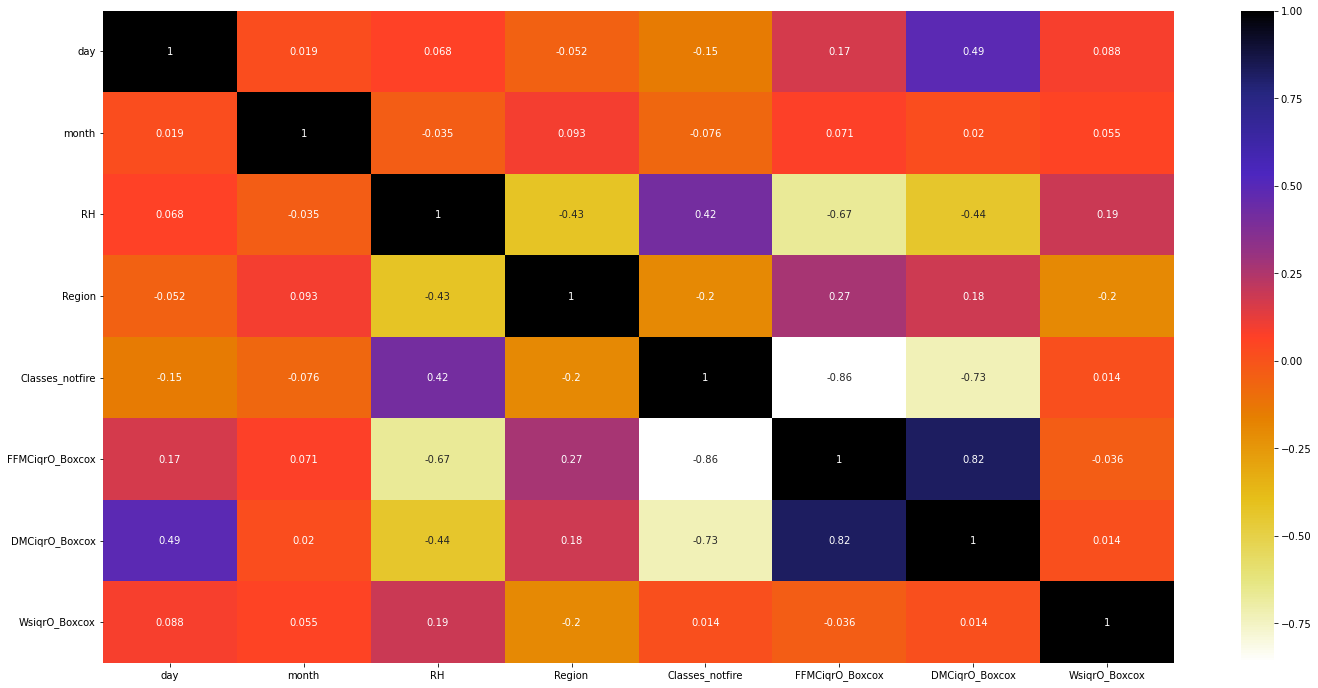

In [969]:
import seaborn as sns
#Using Pearson Correlation good for linear data.
# Using Spearman Correlation good for Non-linear data.
plt.figure(figsize=(24,12))
cor = X_train.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [970]:
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox,WsiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,3.719441,9.507538
55,20,9,58,1.0,1,2.067414e+07,4.331003,6.997559
160,18,7,68,0.0,0,2.787833e+07,3.469010,7.437860
18,7,7,43,1.0,0,2.733706e+07,3.604651,6.997559
92,2,6,61,0.0,1,8.578051e+06,1.694194,6.997559
...,...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.795841,7.437860
103,13,7,45,1.0,0,2.760668e+07,3.341949,6.997559
67,2,9,67,1.0,1,1.657272e+07,1.221108,9.507538
117,13,9,49,1.0,0,3.250754e+07,3.374330,9.507538


In [971]:
X_test

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox,WsiqrO_Boxcox
66,24,6,66,0.0,0,2.856633e+07,3.325597,8.703180
131,27,8,54,1.0,0,3.634623e+07,6.296191,7.437860
145,29,7,73,0.0,0,2.955114e+07,5.109982,7.868350
7,31,7,64,0.0,0,3.041563e+07,5.526162,8.703180
44,14,7,61,0.0,1,1.523873e+07,2.690201,6.997559
74,7,6,54,0.0,0,3.189903e+07,3.102377,6.997559
124,27,7,87,1.0,1,2.122259e+07,3.422120,9.108882
159,26,9,54,0.0,1,2.352788e+07,2.264318,6.083296
86,28,9,47,0.0,1,1.858731e+07,2.534324,7.437860
122,26,6,62,1.0,0,3.129921e+07,4.073410,8.289879


#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [972]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.01, 0.25, 0.25, 0.05, 0.1 , 0.31, 0.3 , 0.03])

In [973]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

FFMCiqrO_Boxcox    0.306222
DMCiqrO_Boxcox     0.296791
RH                 0.252932
month              0.250088
Classes_notfire    0.097060
Region             0.045038
WsiqrO_Boxcox      0.030090
day                0.006304
dtype: float64

<AxesSubplot:>

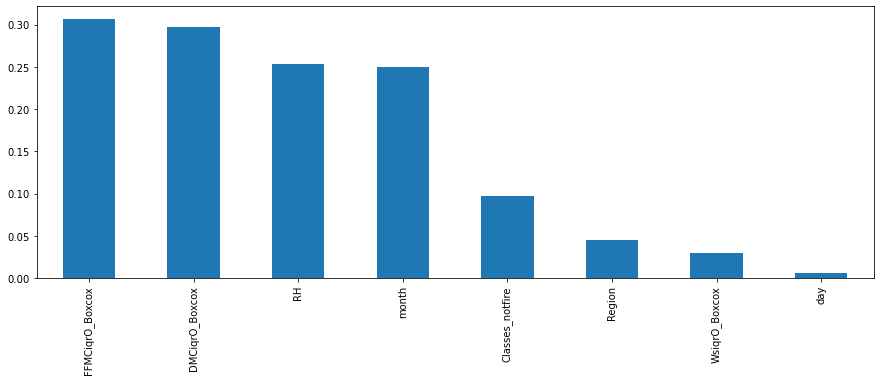

In [974]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [975]:
data.corr()['Temperature'].sort_values(ascending=True)

RH                -0.640282
Classes_notfire   -0.503021
WsiqrO_Boxcox     -0.323371
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO_square      0.426718
DCiqrO_Boxcox      0.460491
BUIiqrO_square     0.547783
DMCiqrO_square     0.579825
BUIiqrO_Boxcox     0.580233
DMCiqrO_Boxcox     0.609642
FWIiqrO_square     0.632393
ISIiqrO_square     0.664173
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

In [976]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=90)
selected_top_columns.fit(X_train, y_train)


SelectPercentile(percentile=90,
                 score_func=<function mutual_info_regression at 0x0000023238A4AC10>)

In [977]:
high_corr = X_train.columns[selected_top_columns.get_support()]
X_train = X_train[high_corr] 
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,3.719441
55,20,9,58,1.0,1,2.067414e+07,4.331003
160,18,7,68,0.0,0,2.787833e+07,3.469010
18,7,7,43,1.0,0,2.733706e+07,3.604651
92,2,6,61,0.0,1,8.578051e+06,1.694194
...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.795841
103,13,7,45,1.0,0,2.760668e+07,3.341949
67,2,9,67,1.0,1,1.657272e+07,1.221108
117,13,9,49,1.0,0,3.250754e+07,3.374330


In [978]:
X_test = X_test[high_corr] 
X_test

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
66,24,6,66,0.0,0,2.856633e+07,3.325597
131,27,8,54,1.0,0,3.634623e+07,6.296191
145,29,7,73,0.0,0,2.955114e+07,5.109982
7,31,7,64,0.0,0,3.041563e+07,5.526162
44,14,7,61,0.0,1,1.523873e+07,2.690201
74,7,6,54,0.0,0,3.189903e+07,3.102377
124,27,7,87,1.0,1,2.122259e+07,3.422120
159,26,9,54,0.0,1,2.352788e+07,2.264318
86,28,9,47,0.0,1,1.858731e+07,2.534324
122,26,6,62,1.0,0,3.129921e+07,4.073410


In [979]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (113, 7)
X_test shape: (49, 7)
y_train shape: (113, 1)
y_test shape: (49, 1)


#### 2.6 Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [980]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in ['Classes_notfire', 'month','Region']:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(data['Temperature'], data[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[['Classes_notfire', 'month','Region'], chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Classes_notfire,Dependent Categories
1,month,Dependent Categories
2,Region,Dependent Categories


In [981]:
(X_train[['day','month','Region','Classes_notfire']]<0).sum()

day                0
month              0
Region             0
Classes_notfire    0
dtype: int64

In [982]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train[['day','month','Region','Classes_notfire']],y_train)

import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=['day','month','Region','Classes_notfire']
p_values

day                1.198879e-20
month              9.999488e-01
Region             8.668776e-01
Classes_notfire    2.778688e-01
dtype: float64

In [983]:
p_values.sort_index(ascending=False)

month              9.999488e-01
day                1.198879e-20
Region             8.668776e-01
Classes_notfire    2.778688e-01
dtype: float64

month is the most imporatant categorical feature when compair with target

In [984]:
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
85,12,6,81,0.0,0,2.601884e+07,3.719441
55,20,9,58,1.0,1,2.067414e+07,4.331003
160,18,7,68,0.0,0,2.787833e+07,3.469010
18,7,7,43,1.0,0,2.733706e+07,3.604651
92,2,6,61,0.0,1,8.578051e+06,1.694194
...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.795841
103,13,7,45,1.0,0,2.760668e+07,3.341949
67,2,9,67,1.0,1,1.657272e+07,1.221108
117,13,9,49,1.0,0,3.250754e+07,3.374330


In [985]:
X_test

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
66,24,6,66,0.0,0,2.856633e+07,3.325597
131,27,8,54,1.0,0,3.634623e+07,6.296191
145,29,7,73,0.0,0,2.955114e+07,5.109982
7,31,7,64,0.0,0,3.041563e+07,5.526162
44,14,7,61,0.0,1,1.523873e+07,2.690201
74,7,6,54,0.0,0,3.189903e+07,3.102377
124,27,7,87,1.0,1,2.122259e+07,3.422120
159,26,9,54,0.0,1,2.352788e+07,2.264318
86,28,9,47,0.0,1,1.858731e+07,2.534324
122,26,6,62,1.0,0,3.129921e+07,4.073410


# Scaling

In [986]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [987]:
X_train

array([[-0.38, -1.41,  1.22, -1.1 , -0.92,  0.33,  0.28],
       [ 0.53,  1.29, -0.28,  0.91,  1.08, -0.14,  0.65],
       [ 0.3 , -0.51,  0.37, -1.1 , -0.92,  0.49,  0.12],
       [-0.94, -0.51, -1.26,  0.91, -0.92,  0.45,  0.21],
       [-1.51, -1.41, -0.09, -1.1 ,  1.08, -1.2 , -0.97],
       [-0.83,  1.29,  1.68,  0.91, -0.92,  0.16, -0.53],
       [ 1.43, -0.51,  0.89, -1.1 , -0.92,  0.63,  1.01],
       [ 1.66,  0.39, -0.87,  0.91, -0.92,  0.98,  1.03],
       [ 0.87,  1.29, -0.54, -1.1 ,  1.08, -0.63, -0.34],
       [-1.28, -1.41,  1.74, -1.1 ,  1.08, -1.7 , -1.85],
       [-1.28,  1.29,  0.7 , -1.1 ,  1.08, -0.98, -1.59],
       [ 1.77,  0.39,  1.15, -1.1 ,  1.08, -1.63, -0.24],
       [-0.15,  1.29,  0.89, -1.1 ,  1.08, -1.7 , -1.96],
       [-0.15,  1.29,  1.22,  0.91, -0.92,  0.4 ,  0.17],
       [-0.6 , -0.51,  0.44, -1.1 ,  1.08, -1.09, -0.62],
       [-1.17, -1.41, -0.15,  0.91,  1.08, -0.36, -0.62],
       [ 1.55,  1.29, -0.54,  0.91,  1.08, -0.12, -0.93],
       [-0.15,

In [988]:
X_test

array([[ 0.98, -1.41,  0.24, -1.1 , -0.92,  0.55,  0.03],
       [ 1.32,  0.39, -0.54,  0.91, -0.92,  1.24,  1.86],
       [ 1.55, -0.51,  0.7 , -1.1 , -0.92,  0.64,  1.13],
       [ 1.77, -0.51,  0.11, -1.1 , -0.92,  0.72,  1.39],
       [-0.15, -0.51, -0.09, -1.1 ,  1.08, -0.62, -0.36],
       [-0.94, -1.41, -0.54, -1.1 , -0.92,  0.85, -0.1 ],
       [ 1.32, -0.51,  1.61,  0.91,  1.08, -0.09,  0.09],
       [ 1.21,  1.29, -0.54, -1.1 ,  1.08,  0.11, -0.62],
       [ 1.43,  1.29, -1.  , -1.1 ,  1.08, -0.32, -0.45],
       [ 1.21, -1.41, -0.02,  0.91, -0.92,  0.79,  0.49],
       [-0.38,  0.39, -0.74, -1.1 ,  1.08,  0.04,  0.43],
       [ 1.55,  1.29,  1.15, -1.1 ,  1.08, -1.7 , -1.26],
       [-0.38, -0.51,  0.83, -1.1 ,  1.08, -0.52, -0.34],
       [ 1.43,  0.39,  0.11, -1.1 , -0.92,  1.01,  1.86],
       [-1.4 , -0.51,  0.89, -1.1 ,  1.08, -1.26, -1.35],
       [ 1.1 ,  0.39, -0.15, -1.1 , -0.92,  0.94,  1.86],
       [-0.94,  1.29,  0.57, -1.1 ,  1.08, -0.91, -1.18],
       [ 1.55,

# Modelling Regression Model for predictiong Temperature of Algerian Forest

In [989]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [990]:
y_pred = regressor.predict(X_test)
numpy.set_printoptions(precision=2)


# 10 records in test set only.
print(numpy.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.6  32.  ]
 [35.47 36.  ]
 [32.06 32.  ]
 [33.12 35.  ]
 [31.64 34.  ]
 [33.81 33.  ]
 [30.28 29.  ]
 [30.84 31.  ]
 [31.12 32.  ]
 [33.18 36.  ]
 [34.01 35.  ]
 [25.82 26.  ]
 [30.75 31.  ]
 [33.92 34.  ]
 [29.04 32.  ]
 [34.39 35.  ]
 [28.94 31.  ]
 [32.51 35.  ]
 [35.94 40.  ]
 [34.14 34.  ]
 [35.58 39.  ]
 [31.97 31.  ]
 [33.06 35.  ]
 [34.3  36.  ]
 [38.52 36.  ]
 [30.71 29.  ]
 [33.95 35.  ]
 [32.48 35.  ]
 [30.96 32.  ]
 [34.19 33.  ]
 [32.59 31.  ]
 [28.46 24.  ]
 [36.73 37.  ]
 [30.28 32.  ]
 [31.69 31.  ]
 [28.83 27.  ]
 [34.31 36.  ]
 [32.81 35.  ]
 [31.24 33.  ]
 [31.85 33.  ]
 [28.51 26.  ]
 [33.55 28.  ]
 [31.11 34.  ]
 [35.78 30.  ]
 [37.49 37.  ]
 [37.56 39.  ]
 [35.12 27.  ]
 [28.06 28.  ]
 [32.68 32.  ]]


In [991]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5276036664999662

In [992]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [993]:
#pip install catboost

In [994]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [995]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.4733
- Mean Absolute Error: 1.9642
- R2 Score: 0.5754
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4122
- Mean Absolute Error: 1.7945
- R2 Score: 0.5276


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.8342
- Mean Absolute Error: 2.1976
- R2 Score: 0.4424
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.5978
- Mean Absolute Error: 2.1076
- R2 Score: 0.4521


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.4736
- Mean Absolute Error: 1.9637
- R2 Score: 0.5753
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4124
- Mean Absolute Error: 1.7969
- R2 Score: 0.5275


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2605
- Mean Absolute Error: 1.6726
- R2 Score: 0.6453
-----------------------

In [996]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.607588
8,AdaBoost Regressor,0.600445
3,K-Neighbors Regressor,0.587442
7,CatBoosting Regressor,0.573266
6,XGBRegressor,0.565767
0,Linear Regression,0.527604
2,Ridge,0.527510
1,Lasso,0.452120
4,Decision Tree,0.421756


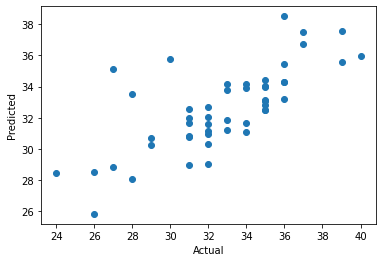

In [997]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

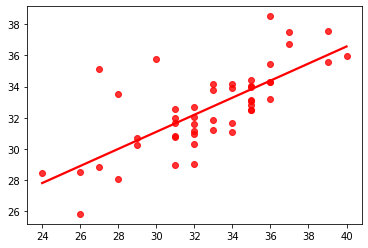

In [998]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');